In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import osmnx as ox
import matplotlib.pyplot as plt

In [39]:
cf = (
    '["highway"~"motorway|trunk|primary|secondary|tertiary"]'
)

G = ox.graph_from_place("Bangkok, Thailand", network_type="drive", custom_filter=cf)
G = ox.project_graph(G, to_crs="EPSG:4326")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

df = pd.read_csv("bkk_loc_table.csv")
geometry = [Point(xy) for xy in zip(df["LONGITUDE"], df["LATITUDE"])]
tmc = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

/opt/anaconda3/envs/311_final/lib/python3.10/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/anaconda3/envs/311_final/lib/python3.10/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/311_final/lib/python3.10/site-packages/shapely/set_operations.py:451: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/opt/anaconda3/envs/311_final/lib/python3.10/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/311_final/lib/python3.10/site-packages/shapely/set_operations.py:451: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [40]:
print(G)

MultiDiGraph with 7262 nodes and 12752 edges


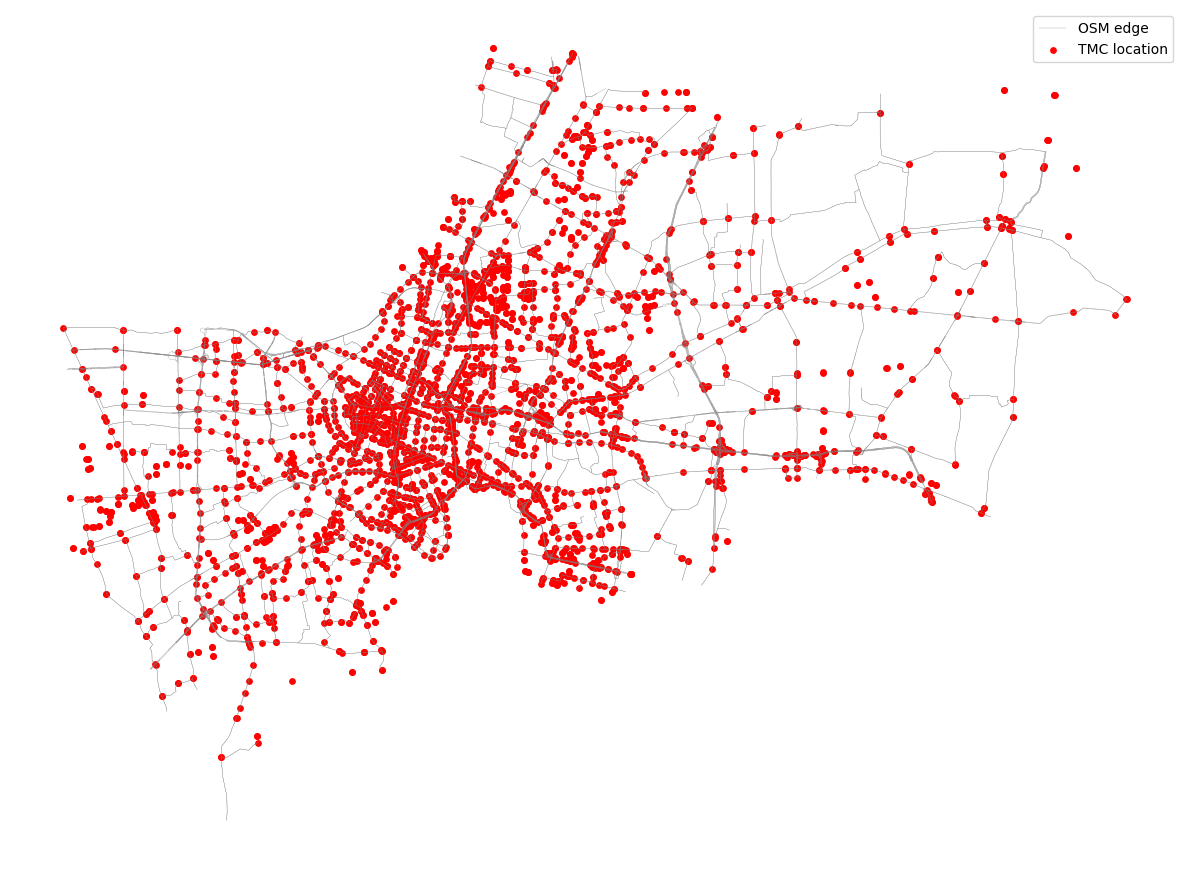

In [41]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_edges.plot(ax=ax, linewidth=0.2, color="gray", label="OSM edge")
tmc.geometry.plot(ax=ax, color="red", markersize=15, label="TMC location")

ax.set_axis_off()
plt.tight_layout()
plt.legend()
plt.show()
